In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\All-Formatted.csv')
df = df.drop(columns={"student_number","school","school_numerical","oapr","oapr_range"})
df.columns

Index(['school_category_numerical', 'school_type_numerical', 'district',
       'track_numerical', 'strand', 'strand_numerical', 'english_number',
       'english_average', 'math_number', 'math_average', 'science_number',
       'science_average', 'sum_ems', 'ems_average_number', 'ems_average',
       'raw1_english', 'raw2_reading', 'raw3_science', 'raw4_quantitative',
       'raw5_abstract', 'sum_raw_scores', 'sum_raw_scores_sansabstract',
       'sum_raw_categorical', 'cat_sum_sansabstract', 'english_categorical',
       'reading_categorical', 'science_categorical',
       'quantitative_categorical', 'abstract_categorical'],
      dtype='object')

In [30]:
outlier = True
feature = 'science_number'
plt.figure(figsize=(9,6),dpi=1200)
plt.xticks(fontsize=8,rotation=90)
plt.scatter(df[feature],df['sum_raw_scores'])
plt.show()

In [72]:

#Pearsons Correlation Coefficient
rawscores = ['raw1_english', 'raw2_reading', 'raw3_science', 'raw4_quantitative', 'raw5_abstract',"sum_raw_scores"]
pearsondf = df[[feature, 'raw1_english', 'raw2_reading', 'raw3_science', 'raw4_quantitative', 'raw5_abstract']].dropna()
if outlier == False:
    # Check Outlier Data Using IQR
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    #print(Lower_Whisker)
    #print(Upper_Whisker)
    # Drop Outlier Data
    pearsondf = pearsondf[pearsondf[feature] > Lower_Whisker]
    pearsondf = pearsondf[pearsondf[feature] < Upper_Whisker]
    
rho_pearson = []
print(feature)
for i in range(5):
    rho_pearson.append(np.corrcoef(pearsondf[feature],pearsondf[rawscores[i]]))
print('Pearson: ')
for i in rho_pearson:
    print(i)

#Spearman Correlation + Pvalue
rho_spearman = []
for i in range(5):
    rho_spearman.append(spearmanr(pearsondf[feature],pearsondf[rawscores[i]]))
print('Spearman: ')
for i in rho_spearman:
    print(i)

science_number
Pearson: 
[[1.         0.33591138]
 [0.33591138 1.        ]]
[[1.         0.30353727]
 [0.30353727 1.        ]]
[[1.         0.28215185]
 [0.28215185 1.        ]]
[[1.         0.30292345]
 [0.30292345 1.        ]]
[[1.         0.17777804]
 [0.17777804 1.        ]]
Spearman: 
SpearmanrResult(correlation=0.33380698201256065, pvalue=2.9769863442346288e-18)
SpearmanrResult(correlation=0.30916127181379177, pvalue=9.423795165658722e-16)
SpearmanrResult(correlation=0.27805985513556863, pvalue=6.459139944263447e-13)
SpearmanrResult(correlation=0.29388690501045883, pvalue=2.5726184282406496e-14)
SpearmanrResult(correlation=0.16913872338419778, pvalue=1.5715761799114982e-05)


sum_ems science_number 0.7511126630493528
ems_average_number sum_ems 0.9334989198360825


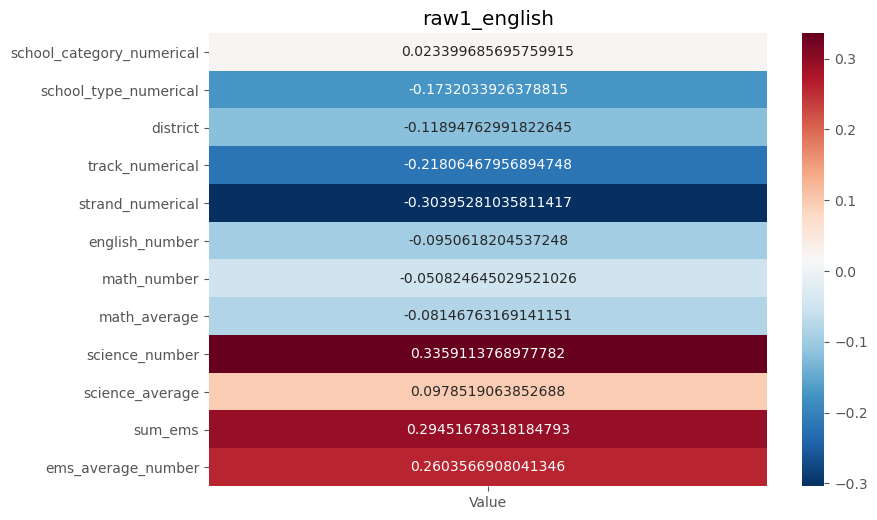

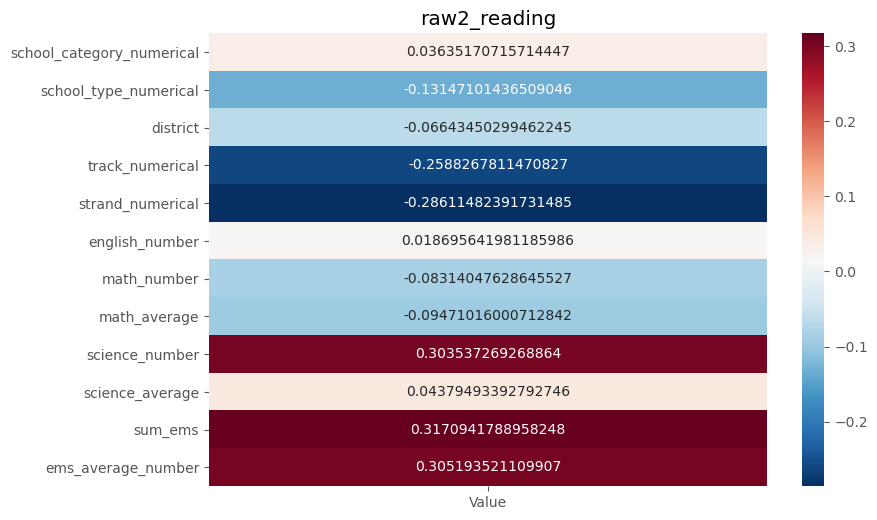

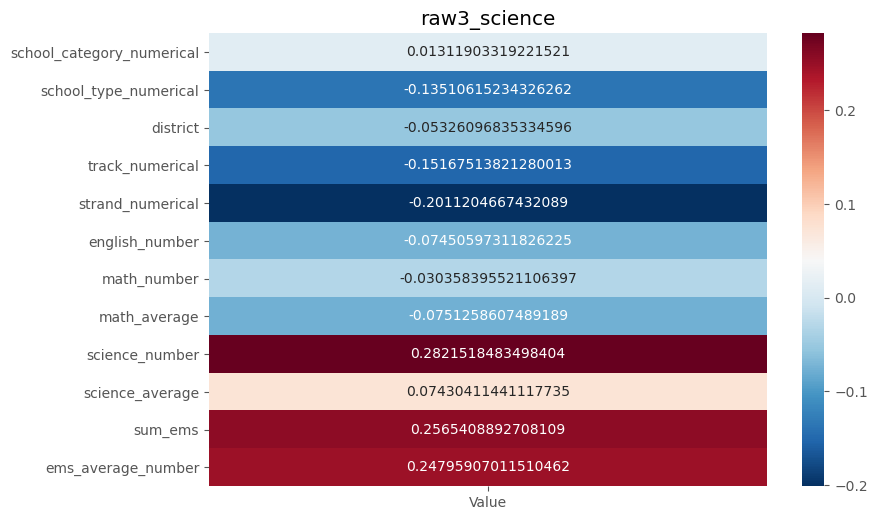

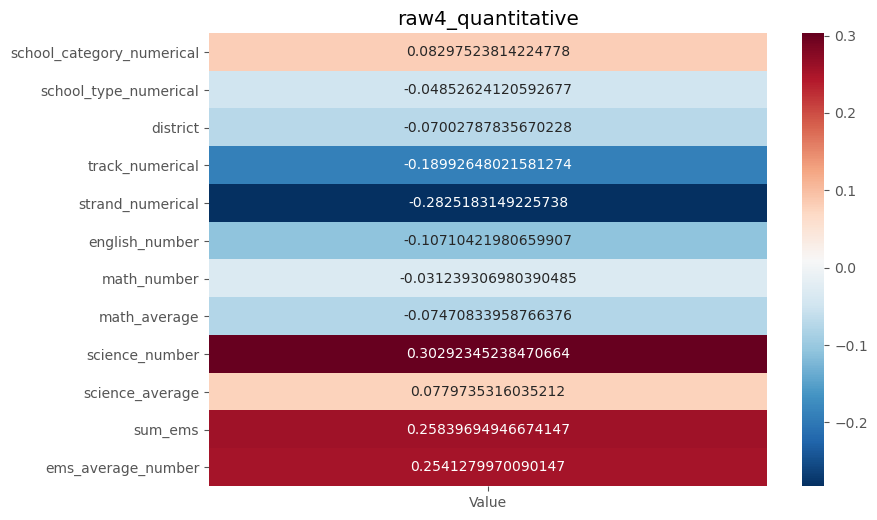

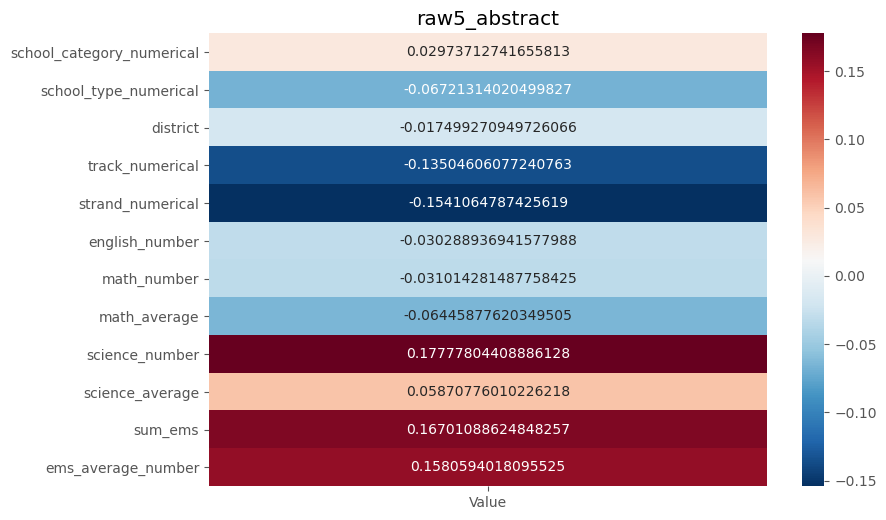

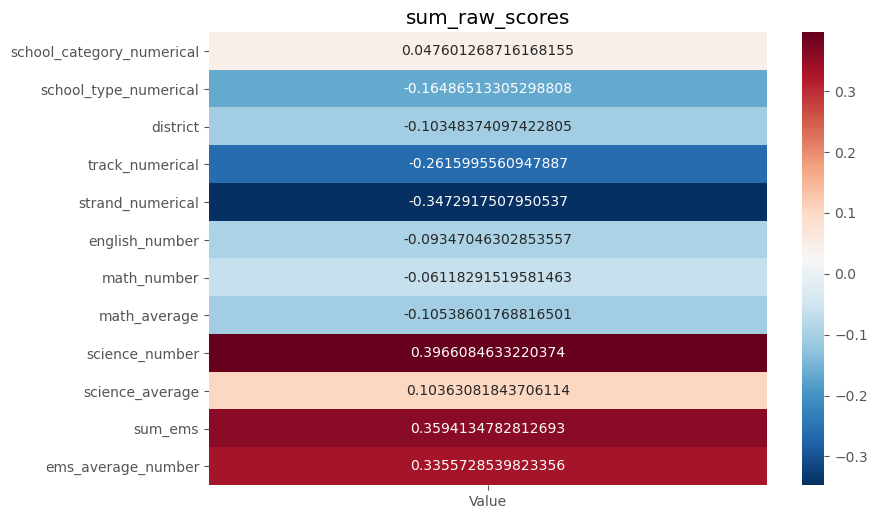

In [73]:
X_num = df.drop(columns = {"sum_raw_scores","sum_raw_scores_sansabstract",'raw1_english', 'raw2_reading', 'raw3_science', 'raw4_quantitative', 'raw5_abstract'})
num_cols = list(X_num.columns)
corr_matrix = X_num.corr(method='spearman')
#sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
#plt.show
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j])
X_y = X_num.copy()
for i in rawscores:
    X_y['score'] = df[i]
    X_y_corr_matrix = X_y.corr(method='pearson')
    corr_target = X_y_corr_matrix['score'].drop(labels=['score'])
    corr_target = corr_target.to_frame(name="Value")
    plt.figure(figsize=(9,6),dpi=100)
    plt.title(i)
    sns.heatmap(corr_target, annot=True, fmt='1', cmap='RdBu_r')
    plt.show

     Intro to Philosophy and the Human Person  raw1  raw2  raw3  raw4  raw5
1                                        86.0    44    21    24    16    14
5                                        91.0    51    23    23    16    17
8                                        92.0    48    26    27    17    12
9                                        85.0    58    20    17    15    12
13                                       90.0    52    25    16    20    16
..                                        ...   ...   ...   ...   ...   ...
204                                      87.0    54    21    25    18    17
207                                      91.0    70    27    24    25    23
208                                      92.0    58    24    25    15    18
209                                      99.0    68    24    25    22    17
211                                      95.0    75    31    30    34    16

[278 rows x 6 columns]


<ipython-input-76-bf0ef2ae627a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterdf[subject] = scatterdf[subject]


<AxesSubplot:xlabel='Intro to Philosophy and the Human Person'>

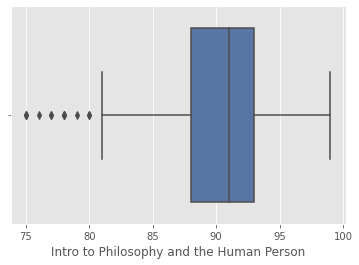

In [76]:
subject = 'Intro to Philosophy and the Human Person' #subjarr[0].name
rawscore = 'raw1'
scatterdf = df[[subject, 'raw1', 'raw2', 'raw3', 'raw4', 'raw5']]
#scatterdf[subject],parameters = stats.boxcox(df[i.name]) #BOXCOX
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(scatterdf[subject].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=[subject])
# scatterdf[subject] = tempFrame[subject] ##

# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) ## Normalization
# d = scaler.fit_transform(scatterdf['raw1'].values.reshape(-1,1))
# tempFrame = pd.DataFrame(d, columns=['raw1'])
# scatterdf['raw1'] = tempFrame['raw1'] ##

scatterdf[subject] = scatterdf[subject]
scatterdf = scatterdf.dropna()
print(scatterdf)
sns.boxplot(data=scatterdf,x=scatterdf[subject])

In [77]:
# Check Outlier Data Using IQR
Q1=scatterdf[subject].quantile(0.25)
Q3=scatterdf[subject].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
#print(Lower_Whisker)
#print(Upper_Whisker)
# Drop Outlier Data
scatterdf = scatterdf[scatterdf[subject] > Lower_Whisker]
scatterdf = scatterdf[scatterdf[subject] < Upper_Whisker]
scatterdf

Intro to Philosophy and the Human Person  raw1  raw2  raw3  raw4  raw5
1                                        86.0    44    21    24    16    14
5                                        91.0    51    23    23    16    17
8                                        92.0    48    26    27    17    12
9                                        85.0    58    20    17    15    12
13                                       90.0    52    25    16    20    16
..                                        ...   ...   ...   ...   ...   ...
204                                      87.0    54    21    25    18    17
207                                      91.0    70    27    24    25    23
208                                      92.0    58    24    25    15    18
209                                      99.0    68    24    25    22    17
211                                      95.0    75    31    30    34    16

[266 rows x 6 columns]

In [78]:
#Pearsons Correlation Coefficient
pearsondf = scatterdf[[subject, 'raw1', 'raw2', 'raw3', 'raw4', 'raw5']].dropna()
pearsondf = pearsondf[pearsondf[subject] > Lower_Whisker]
pearsondf = pearsondf[pearsondf[subject] < Upper_Whisker]
rho_pearson = []
print(subject)
for i in range(5):
    rho_pearson.append(np.corrcoef(pearsondf[subject],pearsondf['raw'+str(i+1)]))
print('Pearson: ')
for i in rho_pearson:
    print(i)

#Spearman Correlation + Pvalue
rho_spearman = []
for i in range(5):
    rho_spearman.append(spearmanr(pearsondf[subject],pearsondf['raw'+str(i+1)]))
print('Spearman: ')
for i in rho_spearman:
    print(i)

Intro to Philosophy and the Human Person
Pearson: 
[[1.         0.37280966]
 [0.37280966 1.        ]]
[[1.         0.24965869]
 [0.24965869 1.        ]]
[[1.         0.29512794]
 [0.29512794 1.        ]]
[[1.         0.26864955]
 [0.26864955 1.        ]]
[[1.        0.1778951]
 [0.1778951 1.       ]]
Spearman: 
SpearmanrResult(correlation=0.3906709399116611, pvalue=3.947715259777125e-11)
SpearmanrResult(correlation=0.29229475091383805, pvalue=1.2278624786682785e-06)
SpearmanrResult(correlation=0.3042170648258729, pvalue=4.221902704026328e-07)
SpearmanrResult(correlation=0.25525006000883665, pvalue=2.5155577046416586e-05)
SpearmanrResult(correlation=0.18606156661833428, pvalue=0.0023119057872929877)


In [79]:
#ScatterPlot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(9,6),dpi=1200)
ax6.set_visible(False)
fig.suptitle(subject)
ax4.set_position([0.24,0.110,0.228,0.343])
ax5.set_position([0.55,0.110,0.228,0.343])
ax1.scatter(scatterdf['raw1'],scatterdf[subject], color='black', alpha=0.2)
ax1.set_title('English Proficiency',fontdict={'fontsize':10,})
ax2.scatter(scatterdf['raw2'],scatterdf[subject], color='black', alpha=0.2)
ax2.set_title('Reading Comprehension',fontdict={'fontsize':10,})
ax3.scatter(scatterdf['raw3'],scatterdf[subject], color='black', alpha=0.2)
ax3.set_title('Science Process Skills',fontdict={'fontsize':10,})
ax4.scatter(scatterdf['raw4'],scatterdf[subject], color='black', alpha=0.2)
ax4.set_title('Quantitative Skills',fontdict={'fontsize':10,})
ax5.scatter(scatterdf['raw5'],scatterdf[subject], color='black', alpha=0.2)
ax5.set_title('Abstract Thinking Skills',fontdict={'fontsize':10,})
plt.xlabel('Grade')
plt.ylabel('Raw Score')
plt.title(label=subject)
fig.show

<bound method Figure.show of <Figure size 10800x7200 with 6 Axes>>

21st Century Literature from the Philippines and the World  \
0                                                  NaN            
1                                                  NaN            
2                                                 89.0            
3                                                 92.0            
4                                                 93.0            
..                                                 ...            
207                                               94.0            
208                                                NaN            
209                                                NaN            
210                                               88.0            
211                                                NaN            

     Disaster Readiness and Risk Reduction  Empowerment Technologies  \
0                                      NaN                      91.0   
1                                      NaN                      84.0   
2                                     95.0                       NaN   
3                                     94.0                       NaN   
4                                      NaN                       NaN   
..                                     ...                       ...   
207                                   93.0                       NaN   
208                                   98.0                       NaN   
209                                    NaN                       NaN   
210                                    NaN                       NaN   
211                                   93.0                       NaN   

     English for Academic and Professional Purposes  Entrepreneurship  \
0                                               NaN              83.0   
1                                               NaN              80.0   
2                                               NaN              85.0   
3                                               NaN              90.0   
4                                              97.0              98.0   
..                                              ...               ...   
207                                            94.0              87.0   
208                                            89.0               NaN   
209                                            91.0               NaN   
210                                            85.0              95.0   
211                                            95.0               NaN   

     Filipino Sa Piling Larang-Akademik  General Biology 2  \
0                                   NaN                NaN   
1                                  88.0                NaN   
2                                  95.0               95.0   
3                                  88.0               90.0   
4                                  93.0               90.0   
..                                  ...                ...   
207                                91.0                NaN   
208                                94.0                NaN   
209                                98.0               90.0   
210                                91.0                NaN   
211                                97.0               96.0   

     General Chemistry 2  General Physics 1  General Physics 2  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                   85.0               91.0               90.0   
3                    NaN               84.0               87.0   
4                   89.0               88.0               91.0   
..                   ...                ...                ...   
207                 91.0               90.0               92.0   
208                  NaN               91.0               90.0   
209                  NaN               89.0               90.0   
210                 88.0               91.0          

In [ ]:
X_num = df.drop(columns=['appno','name','schname','codename','date_exam'])
rawlist = ['raw1', 'raw2', 'raw3', 'raw4', 'raw5']
y1 = df['raw1']
y2 = df['raw2']
y3 = df['raw3']
y4 = df['raw4']
y5 = df['raw5']

X_num = df.drop(columns=[col for col in df if col not in (nullrange['Subjects'].tolist())])
X_num
num_cols = list(X_num.columns)
corr_matrix = X_num.corr(method='spearman')
#sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
#plt.show
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j])
X_y = X_num.copy()
X_y['score'] = y5
X_y_corr_matrix = X_y.corr(method='pearson')
corr_target = X_y_corr_matrix[['score']].drop(labels=['score'])
corr_target
plt.figure(figsize=(9,6),dpi=1200)
sns.heatmap(corr_target, annot=True, fmt='1', cmap='RdBu_r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_df = X_num[['21st Century Literature from the Philippines and the World']]
mutual_info_df['score'] = y1
mutual_info_df = mutual_info_df.dropna()
rho_mutual_info = mutual_info_regression(mutual_info_df[['21st Century Literature from the Philippines and the World']], mutual_info_df['score'])
rho_mutual_info

<ipython-input-120-3bcd2fd8f195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_info_df['score'] = y1


array([0.06658162])